# EDA & Preprocessing
Project 2 - Malware Infection

Authors: Michele Benvenuto, Roberto Figueroa, Gustavo Mendez

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import (
    SelectKBest,
    f_classif
)
from sklearn.ensemble import ExtraTreesClassifier

# Own utils
from utils import reduce_memory_usage, get_dataset_dtypes, derivate_features

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline

Loading datasets ...

In [2]:
# Set datatypes
dtypes, numerical_columns, categorical_columns = get_dataset_dtypes()

In [3]:
# Load large dataset
df = pd.read_csv('./datasets/train_preprocessed.csv', dtype=dtypes, index_col=[0])
# df_test = pd.read_csv('./datasets/test_preprocessed.csv', dtype=dtypes)

This must not be done if the computer is capable to work with all observations

In [4]:
# df = df.sample(frac=0.25)

In [5]:
print(f"Train dataset shape: {df.shape}")

Train dataset shape: (7667792, 67)


## Feature selection

We are going to test different ways to select best features.

### Univariate Selection

In [7]:
X = df.drop('HasDetections', axis=1, inplace=False)
y = df['HasDetections']
del df

In [8]:
fs = SelectKBest(score_func=f_classif, k=10)

In [9]:
X_selected = fs.fit(X, y)

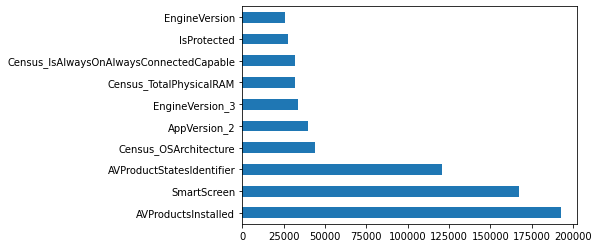

In [10]:
dfscores = pd.DataFrame(X_selected.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(10,'Score')
feat_importances_skb = pd.Series(X_selected.scores_, index=X.columns)
feat_importances_skb.nlargest(10).plot(kind='barh')
plt.show()

del dfscores, dfcolumns, featureScores, feat_importances_skb

### Feature Importance

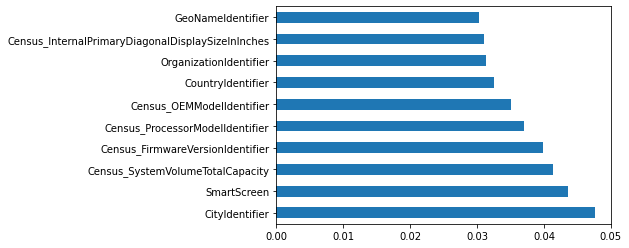

In [11]:
"""
Warn :
 -n_jobs for parallel work
 -if computer is capable then n_estimators could be > 10
"""
model = ExtraTreesClassifier(n_jobs=4)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

del model, feat_importances

### Most positive/negative correlated features with HasDetections

In [18]:
_corr = X.corrwith(y, axis = 0, method="pearson")

<AxesSubplot:>

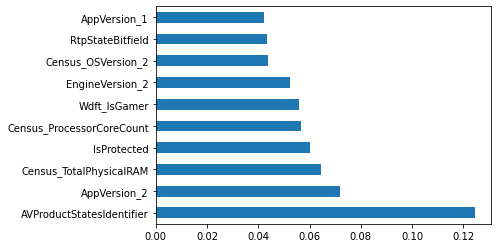

In [19]:
_corr.nlargest(10).plot(kind='barh')

<AxesSubplot:>

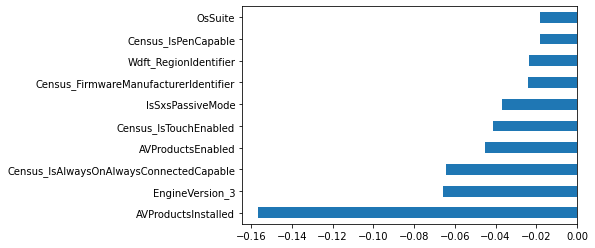

In [20]:
_corr.nsmallest(10).plot(kind='barh')

## Final Features

**Main**

* AVproductInstalled
* SmartScreen
* AVProductStatesIdentifier
* Census_OSArchitecture
* AppVersion_2
* EngineVersion_3
* Census_TotalPhysicalRAM
* IsProtected
* EngineVersion
* Census_SystemVolumeTotalCapacity
* CountryIdentifier
* OrganizationIdentifier
* AVProductsInstalled
* AppVersion_3

**Auxiliar features**

* Census_FirmwareVersionIdentifier
* Census_ProcessorModelIdentifier
* Census_OEMModelIdentifier
* CountryIdentifier
* OrganizationIdentifier